<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/07.01-Coughanowr-Ch17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to use functions from `tbcontrol`, `numpy` and `matplotlib` to solve the examples in [Chapter 17](https://udghoshna.files.wordpress.com/2013/06/136649035-process-systems-analysis-and-control-d-coughanowr-3rd-ed.pdf#page=374) of Donald R.Coughanowr and Steven E. LeBlanc, Process Systems
Analysis and Control.

In [ ]:
!pip install tbcontrol
from tbcontrol import blocksim 
import numpy # as we usual need some numerical gadgets
import matplotlib.pyplot as plt # in order to produce nice plots
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
# Example 17.1

def conventional_control(ts, Kc=2.84, taui=5, R=1, U=0):
  # Creating the blocks for the diagram 17-5 (a)
  Gc = blocksim.PI('Gc', 'E', 'P', Kc, taui)
  G1 = blocksim.LTI('G1', 'P', 'Y1', 1, [1, 1])
  G2 = blocksim.LTI('G2', 'X2', 'Y2', 1, [1, 1])
  G3 = blocksim.LTI('G3', 'Y2', 'Y3', 1, [1, 1])
  G4 = blocksim.LTI('G4', 'Y3', 'Y4', 1, 1)
  # Creating the diagram 17-5 (a)
  diagram = blocksim.Diagram([Gc, G1, G2, G3, G4], 
                               sums={'E': ('+R', '-Y4'), 
                                     'X2': ('+Y1', '+U')}, 
                               inputs={'R': blocksim.step(size=R), 
                                       'U' : blocksim.step(size=U)})
  simulation_results = diagram.simulate(ts, progress=True)
  return simulation_results['R'], simulation_results['Y4']

def cascade_control(ts, Kc=1.00, taui=0.63, Kc2=10.0, R=1, U=0):
  # Creating the blocks for the diagram 17-5 (b)
  Gc = blocksim.PI('Gc', 'E', 'P', Kc, taui)
  Gc2 = blocksim.LTI('Gc2', 'E2', 'P2', Kc2, 1)
  G1 = blocksim.LTI('G1', 'P2', 'Y1', 1, [1, 1])
  G2 = blocksim.LTI('G2', 'X2', 'Y2', 1, [1, 1])
  G3 = blocksim.LTI('G3', 'Y2', 'Y3', 1, [1, 1])
  G4 = blocksim.LTI('G4', 'Y3', 'Y4', 1, 1)
  G5 = blocksim.LTI('G5', 'Y2', 'Y5', 1, 1)
  # Creating the diagram 17-5 (b)
  diagram = blocksim.Diagram([Gc, Gc2, G1, G2, G3, G4, G5], 
                               sums={'E': ('+R', '-Y4'), 
                                     'X2': ('+Y1', '+U'),
                                     'E2': ('+P' , '-Y5')}, 
                               inputs={'R': blocksim.step(size=R), 
                                       'U' : blocksim.step(size=U)})
  simulation_results = diagram.simulate(ts, progress=True)
  return simulation_results['R'], simulation_results['Y4']

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'FIGURE 17-6')

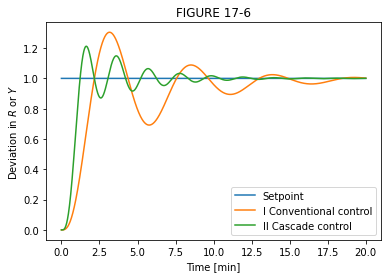

In [97]:
# FIGURE 17-6
ts = numpy.linspace(start=0, stop=20, num=20*100)
R, Y4conv = conventional_control(ts)
_, Y4casc = cascade_control(ts)
plt.plot(ts, R, ts, Y4conv, ts, Y4casc)
plt.xlabel('Time [min]')
plt.ylabel('Deviation in $R$ or $Y$')
plt.legend(['Setpoint', 'I Conventional control', 'II Cascade control'])
plt.title('FIGURE 17-6')

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1632: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'FIGURE 17-7')

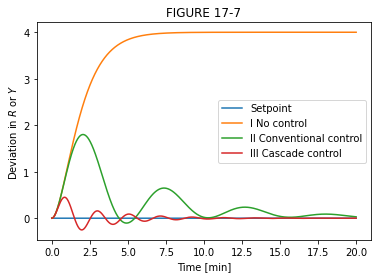

In [98]:
# FIGURE 17-7
R, Y4noco = conventional_control(ts, Kc=0, R=0, U=4)
_, Y4conv = conventional_control(ts, R=0, U=4)
_, Y4casc = cascade_control(ts, R=0, U=4)
plt.plot(ts, R, ts, Y4noco, ts, Y4conv, ts, Y4casc)
plt.xlabel('Time [min]')
plt.ylabel('Deviation in $R$ or $Y$')
plt.legend(['Setpoint', 'I No control', 'II Conventional control', 'III Cascade control'])
plt.title('FIGURE 17-7')

In [99]:
# FIGURE 17-9(b)

def fb_control(ts, Kc=2.84, taui=5, R=1, Ci=0):
  # Creating the blocks for the diagram 17-9 (b)
  Gc = blocksim.PI('Gc', 'E', 'P', Kc, taui)
  G1 = blocksim.LTI('G1', 'P', 'Y1', 1, [1, 3, 3, 1])
  G2 = blocksim.LTI('G2', 'Ci', 'Y2', 1, [5, 1])
  G3 = blocksim.LTI('G3', 'Y2', 'Y3', 1, [1, 3, 3, 1])
  # Creating the diagram 17-9 (b)
  diagram = blocksim.Diagram([Gc, G1, G2, G3], 
                               sums={'E': ('+R', '-C'), 
                                     'C': ('+Y3', '+Y1')}, 
                               inputs={'R': blocksim.step(size=R), 
                                       'Ci' : blocksim.step(size=Ci)})
  simulation_results = diagram.simulate(ts, progress=True)
  return simulation_results['R'], simulation_results['C']

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Text(0.5, 1.0, 'FIGURE 17-10')

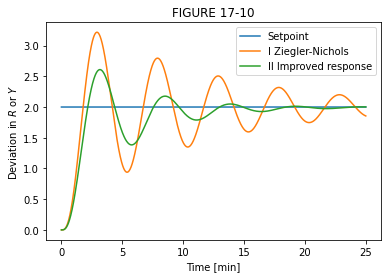

In [103]:
# FIGURE 17-10
ts = numpy.linspace(start=0, stop=25, num=25*100)
R, C_ZN = fb_control(ts, Kc=3.65, taui=3, R=2)
_, C_Imp = fb_control(ts, R=2)
plt.plot(ts, R, ts, C_ZN, ts, C_Imp)
plt.xlabel('Time [min]')
plt.ylabel('Deviation in $R$ or $Y$')
plt.legend(['Setpoint', 'I Ziegler-Nichols', 'II Improved response'])
plt.title('FIGURE 17-10')

In [101]:
# FIGURE 17-12

def fb_plus_ff_control(ts, Kc=2.84, taui=5, Kff=-1, tld=0, tlg=5, R=0, Ci=10):
  # Creating the blocks for the diagram 17-12
  Gc = blocksim.PI('Gc', 'E', 'P', Kc, taui)
  G1 = blocksim.LTI('G1', 'Pplus', 'Y1', 1, [1, 3, 3, 1])
  G2 = blocksim.LTI('G2', 'Ci', 'Y2', 1, [5, 1])
  G3 = blocksim.LTI('G3', 'Y2', 'Y3', 1, [1, 3, 3, 1])
  Gff = blocksim.LTI('G3', 'Ci', 'Pff', [Kff*tld, Kff], [tlg, 1])
  # Creating the diagram 17-12
  diagram = blocksim.Diagram([Gc, G1, G2, G3, Gff], 
                               sums={'E': ('+R', '-C'), 
                                     'C': ('+Y3', '+Y1'),
                                     'Pplus': ('+P', '+Pff')}, 
                               inputs={'R': blocksim.step(size=R), 
                                       'Ci' : blocksim.step(size=Ci)})
  simulation_results = diagram.simulate(ts, progress=True)
  return simulation_results['R'], simulation_results['C']

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1632: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Text(0.5, 1.0, 'FIGURE 17-11')

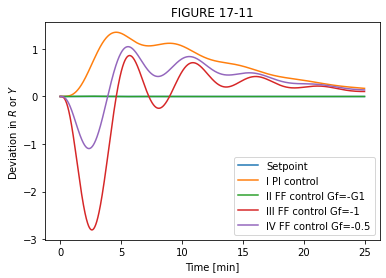

In [104]:
# FIGURE 17-11
R, C_fb = fb_plus_ff_control(ts, Kff=0)
_, C_ff1 = fb_plus_ff_control(ts)
_, C_ff2 = fb_plus_ff_control(ts, tlg=0)
_, C_ff3 = fb_plus_ff_control(ts, Kff=-0.5, tlg=0)
plt.plot(ts, R, ts, C_fb, ts, C_ff1, ts, C_ff2, ts, C_ff3)
plt.xlabel('Time [min]')
plt.ylabel('Deviation in $R$ or $Y$')
plt.legend(['Setpoint', 'I PI control', 'II FF control Gf=-G1', 'III FF control Gf=-1', 'IV FF control Gf=-0.5'])
plt.title('FIGURE 17-11')